# AutoEncoder (Input: MNIST, Output: MNIST)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import sys
# path를 append: 나의 source directory는 Google Disk의 Colab Notebooks/Lecture 아래에 있다고 가정
sys.path.append('/content/drive/My Drive/Colab Notebooks/Lecture')
# local library인 utils.loaders와 models.AE class를 import
from utils.loaders import load_mnist, load_model
from models.AE import Autoencoder
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.


## 매개변수 설정

In [0]:
# 실행 매개변수
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = '/content/drive/My Drive/Colab Notebooks/Lecture/run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load'

## Loading Data (데이터 읽어오기)

In [0]:
(x_train, y_train), (x_test, y_test) = load_mnist()

## Creating AutoEncoder (신경망 구조 정의)

In [0]:
AE = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [0]:
AE.encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 64)          0   

In [0]:
AE.decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0   

## Training AutoEncoder (오토인코더 훈련)

In [0]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [0]:
AE.compile(LEARNING_RATE)

In [0]:
AE.train(     
    x_train[:1000]
    , batch_size = BATCH_SIZE
    , epochs = 100
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1918

Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 2/100
1000/1000 [==============================] - 0s 237us/step - loss: 0.1027

Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 3/100
1000/1000 [==============================] - 0s 231us/step - loss: 0.0743

Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 4/100
1000/1000 [==============================] - 0s 247us/step - loss: 0.0653

Epoch 00004: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 5/100
1000/1000 [==============================] - 0s 231us/step - loss: 0.0596

Epoch 00005: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weight

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.172087). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 403us/step - loss: 0.0523

Epoch 00013: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 14/100
1000/1000 [==============================] - 0s 222us/step - loss: 0.0518

Epoch 00014: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 15/100
1000/1000 [==============================] - 0s 220us/step - loss: 0.0516

Epoch 00015: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 16/100
1000/1000 [==============================] - 0s 220us/step - loss: 0.0511

Epoch 00016: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 17/100
1000/1000 [==============================] - 0s 233us/step - loss: 0.0509

Epoch 00017: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.174947). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 395us/step - loss: 0.0472

Epoch 00032: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 33/100
1000/1000 [==============================] - 0s 229us/step - loss: 0.0471

Epoch 00033: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 34/100
1000/1000 [==============================] - 0s 221us/step - loss: 0.0468

Epoch 00034: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 35/100
1000/1000 [==============================] - 0s 225us/step - loss: 0.0465

Epoch 00035: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 36/100
1000/1000 [==============================] - 0s 216us/step - loss: 0.0464

Epoch 00036: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.142734). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 371us/step - loss: 0.0455

Epoch 00041: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 42/100
1000/1000 [==============================] - 0s 221us/step - loss: 0.0453

Epoch 00042: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 43/100
1000/1000 [==============================] - 0s 218us/step - loss: 0.0453

Epoch 00043: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 44/100
1000/1000 [==============================] - 0s 226us/step - loss: 0.0451

Epoch 00044: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 45/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.0449

Epoch 00045: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.152094). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 371us/step - loss: 0.0426

Epoch 00059: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 60/100
1000/1000 [==============================] - 0s 210us/step - loss: 0.0432

Epoch 00060: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 61/100
1000/1000 [==============================] - 0s 220us/step - loss: 0.0428

Epoch 00061: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 62/100
1000/1000 [==============================] - 0s 225us/step - loss: 0.0425

Epoch 00062: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 63/100
1000/1000 [==============================] - 0s 223us/step - loss: 0.0425

Epoch 00063: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.170789). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 386us/step - loss: 0.0397

Epoch 00092: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 93/100
1000/1000 [==============================] - 0s 219us/step - loss: 0.0395

Epoch 00093: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 94/100
1000/1000 [==============================] - 0s 224us/step - loss: 0.0392

Epoch 00094: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 95/100
1000/1000 [==============================] - 0s 226us/step - loss: 0.0390

Epoch 00095: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 96/100
1000/1000 [==============================] - 0s 230us/step - loss: 0.0389

Epoch 00096: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

# 모델 구조 불러오기

In [0]:
AE = load_model(Autoencoder, RUN_FOLDER)

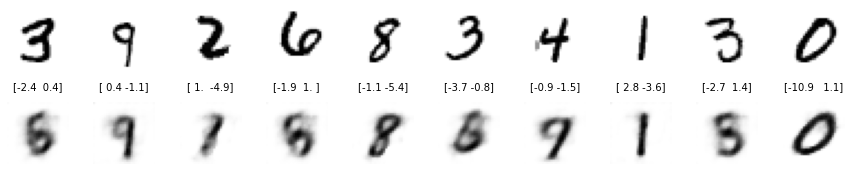

In [0]:
# Reconstructing Original Images
n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

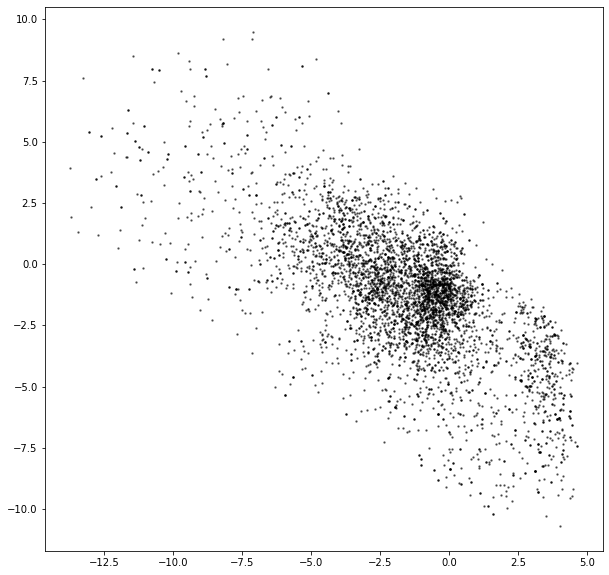

In [0]:
# Encoding된 z_points들을 visualize
n_to_show = 5000
grid_size = 15
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

plt.show()

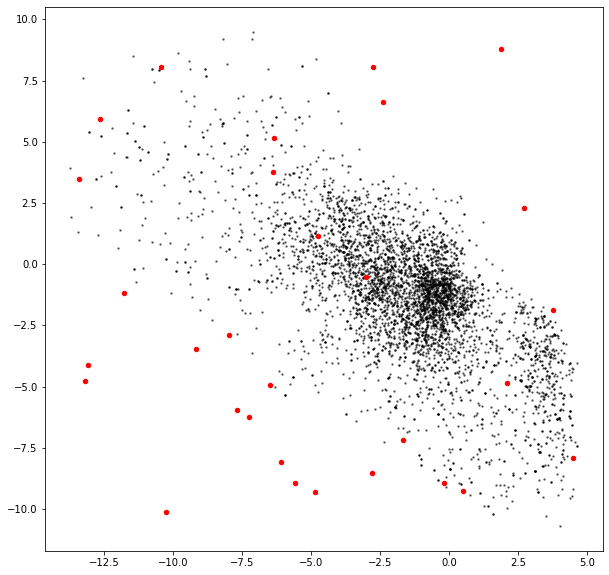

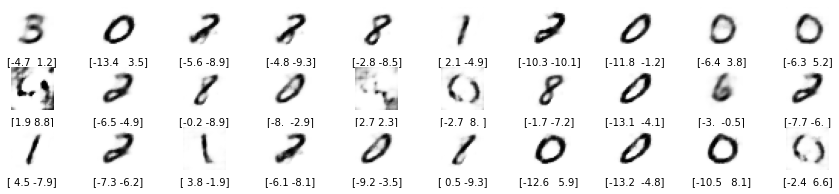

In [0]:
# Encoder가 생성한 z_points가 아닌 새로운 z_points들에서 reconstruct
grid_size = 15
figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x, max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y, max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c='red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

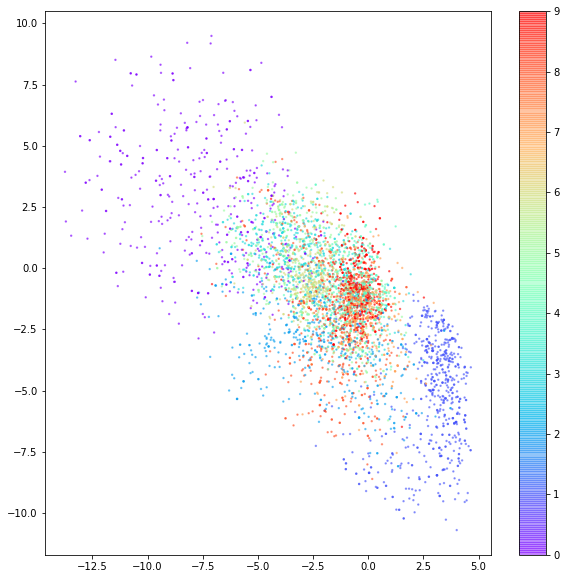

In [0]:
# z-points를 원래 숫자 label대로 coloring 해 보기

figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()

plt.show()

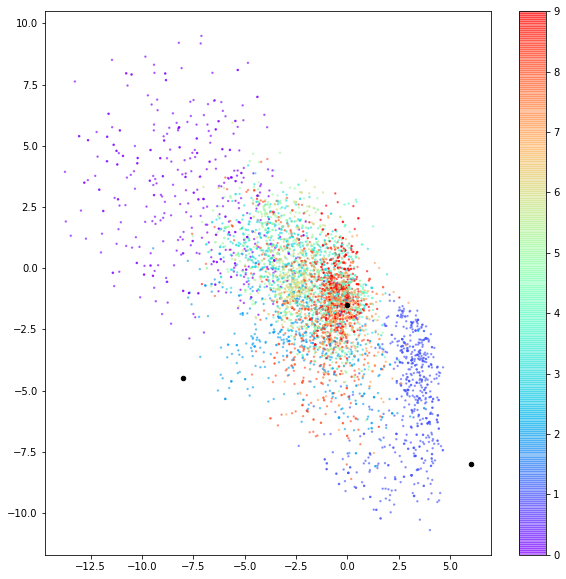

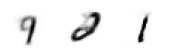

In [0]:
# 낮은 품질의 output visualize해 보기

figsize = 10

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], cmap='rainbow', c=example_labels, alpha=0.5, s=2)
plt.colorbar()

bad_examples = np.array([[0, -1.5], [-8, -4.5], [6, -8]])
plt.scatter(bad_examples[:, 0] , bad_examples[:, 1], c='black', alpha=1, s=20)

plt.show()

reconst = AE.decoder.predict(bad_examples)

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(3):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

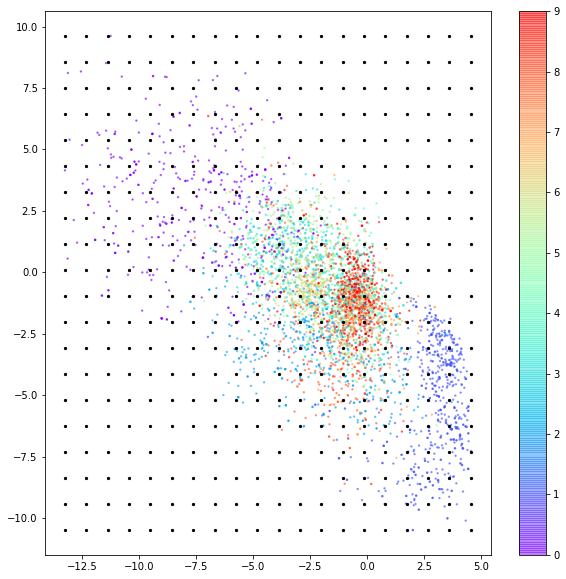

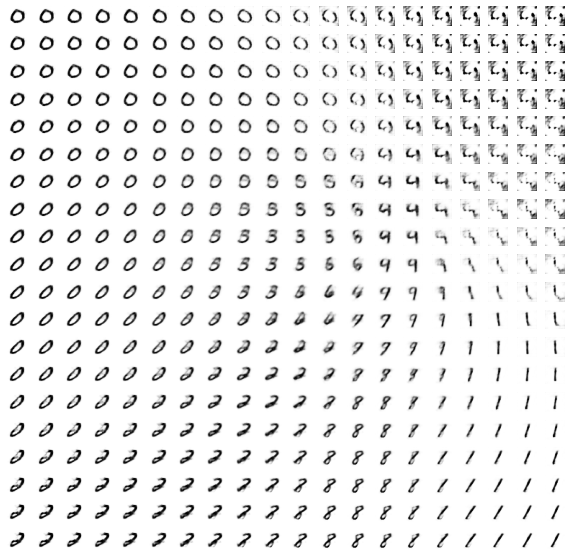

In [0]:
# Latent space 에서 sampling된 digit reconstruction

n_to_show = 5000
grid_size = 20

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c=example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

## 과제 
• 10-1-autoencoder 프로그램에서 latent representation (z data)을 다른 형태로 바꾸었을 때 autoencoder의 performance가 증가하는지 감소하는지 비교하라.

– 어떤 형태의 latent representation을 사용하였는가?
2차원에서 10차원으로 늘림

– performance는 무엇으로 측정할 수 있는가? 차원을 많이 쌓아 다양한 feature들의 값을 보관할 수 있다면 더 정확한 decoding되는 것을 확인 할 수 있다.

In [0]:
AE = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 10 # 해당 차원 변경
)

if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [0]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [0]:
AE.compile(LEARNING_RATE)

In [0]:
AE.train(     
    x_train[:1000]
    , batch_size = BATCH_SIZE
    , epochs = 100
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

Epoch 1/100
1000/1000 [==============================] - 1s 592us/step - loss: 0.1738

Epoch 00001: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 2/100
1000/1000 [==============================] - 0s 211us/step - loss: 0.0975

Epoch 00002: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 3/100
1000/1000 [==============================] - 0s 217us/step - loss: 0.0713

Epoch 00003: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 4/100
1000/1000 [==============================] - 0s 219us/step - loss: 0.0638

Epoch 00004: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 5/100
1000/1000 [==============================] - 0s 255us/step - loss: 0.0548

Epoch 00005: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.174838). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 388us/step - loss: 0.0217

Epoch 00014: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 15/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.0211

Epoch 00015: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 16/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.0205

Epoch 00016: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 17/100
1000/1000 [==============================] - 0s 211us/step - loss: 0.0201

Epoch 00017: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 18/100
1000/1000 [==============================] - 0s 225us/step - loss: 0.0196

Epoch 00018: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.178769). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 391us/step - loss: 0.0118

Epoch 00051: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 52/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.0112

Epoch 00052: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 53/100
1000/1000 [==============================] - 0s 212us/step - loss: 0.0113

Epoch 00053: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 54/100
1000/1000 [==============================] - 0s 206us/step - loss: 0.0112

Epoch 00054: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 55/100
1000/1000 [==============================] - 0s 228us/step - loss: 0.0111

Epoch 00055: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.178529). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 393us/step - loss: 0.0106

Epoch 00060: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 61/100
1000/1000 [==============================] - 0s 209us/step - loss: 0.0105

Epoch 00061: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 62/100
1000/1000 [==============================] - 0s 214us/step - loss: 0.0104

Epoch 00062: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 63/100
1000/1000 [==============================] - 0s 210us/step - loss: 0.0104

Epoch 00063: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 64/100
1000/1000 [==============================] - 0s 227us/step - loss: 0.0103

Epoch 00064: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.177339). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 393us/step - loss: 0.0097

Epoch 00069: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 70/100
1000/1000 [==============================] - 0s 226us/step - loss: 0.0095

Epoch 00070: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 71/100
1000/1000 [==============================] - 0s 218us/step - loss: 0.0096

Epoch 00071: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 72/100
1000/1000 [==============================] - 0s 207us/step - loss: 0.0095

Epoch 00072: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 73/100
1000/1000 [==============================] - 0s 208us/step - loss: 0.0094

Epoch 00073: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.155025). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 365us/step - loss: 0.0092

Epoch 00077: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 78/100
1000/1000 [==============================] - 0s 217us/step - loss: 0.0090

Epoch 00078: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 79/100
1000/1000 [==============================] - 0s 228us/step - loss: 0.0089

Epoch 00079: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 80/100
1000/1000 [==============================] - 0s 219us/step - loss: 0.0087

Epoch 00080: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 81/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.0086

Epoch 00081: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.178007). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1000/1000 [==============================] - 0s 390us/step - loss: 0.0079

Epoch 00094: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 95/100
1000/1000 [==============================] - 0s 209us/step - loss: 0.0078

Epoch 00095: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 96/100
1000/1000 [==============================] - 0s 215us/step - loss: 0.0078

Epoch 00096: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 97/100
1000/1000 [==============================] - 0s 226us/step - loss: 0.0077

Epoch 00097: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weights.h5
Epoch 98/100
1000/1000 [==============================] - 0s 220us/step - loss: 0.0076

Epoch 00098: saving model to /content/drive/My Drive/Colab Notebooks/Lecture/run/vae/0001_digits/weights/weig

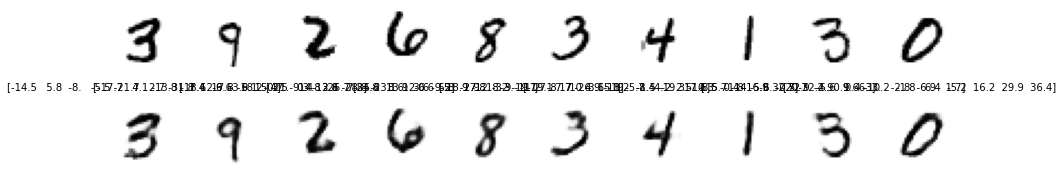

In [0]:
# Reconstructing Original Images
n_to_show = 10
np.random.seed(88)
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = AE.encoder.predict(example_images)

reconst_images = AE.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

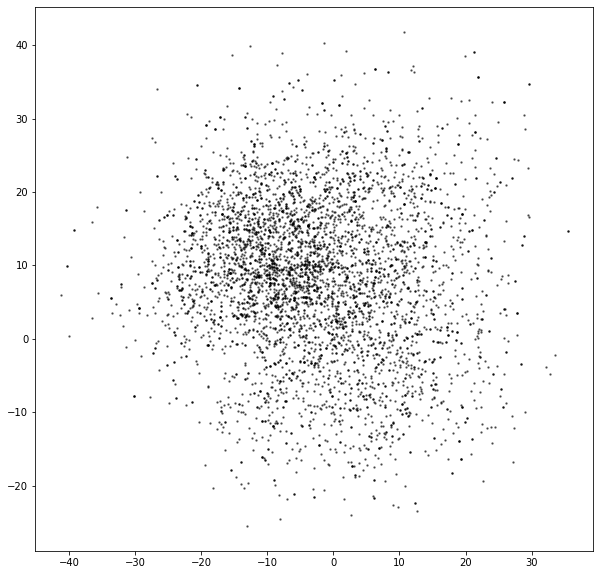

In [0]:
# Encoding된 z_points들을 visualize
n_to_show = 5000
grid_size = 15
figsize = 10

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

plt.show()